# Exploring Trump-related Reddit Dataset

#### by Kateryna Kozachenko and Kateryna Udovychenko

##### Contents:
* Data Preparation
* Visualization
* Conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r'\comments.csv')
data.head(10)

,author,created,created_utc,body,score,subreddit,subreddit_id,ups,downs,score.1,link_id,id
0,u/IntnsRed,2025-01-01 04:37,1.735699e+09,Without a doubt. He sets the standard of how e...,1,antitrump,t5_3avrp,1,0,1,t3_1hp9ir1,m4sjzqk
1,u/Comfortable-Cap7110,2025-01-01 09:07,1.735715e+09,How can the dumbest impulsive vindictive idiot...,2,antitrump,t5_3avrp,2,0,2,t3_1hqxb45,m4tfr00
2,u/FreneticPlatypus,2025-01-01 14:24,1.735734e+09,Yeah. Because he’s *always* stuck to precedent.,1,antitrump,t5_3avrp,1,0,1,t3_1hqy1um,m4u8snu
3,u/Socky_McPuppet,2025-01-01 15:11,1.735737e+09,"I mean, yeah, and I think it's really interest...",2,antitrump,t5_3avrp,2,0,2,t3_1hqnj60,m4udx8z
4,u/2katts,2025-01-01 20:35,1.735757e+09,Worse yet someone who reads at a 4th grade lev...,4,antitrump,t5_3avrp,4,0,4,t3_1hqxb45,m4vtkt4
5,u/IntnsRed,2025-01-01 22:35,1.735764e+09,**This!!** **^^** **^^** **^^** **^^** **^^** ...,1,antitrump,t5_3avrp,1,0,1,t3_1hqxb45,m4wfwz2
6,u/IntnsRed,2025-01-02 00:51,1.735772e+09,> but until Democrats begin to honestly deal w...,1,antitrump,t5_3avrp,1,0,1,t3_1hqnj60,m4x5cx5
7,u/Demalab,2025-01-02 05:17,1.735788e+09,I used to work for VON and the nurses are abso...,2,antitrump,t5_3avrp,2,0,2,t3_1hrg9hj,m4yd0dp
8,u/FreneticPlatypus,2025-01-02 13:01,1.735816e+09,WE will face the political reality of what his...,12,antitrump,t5_3avrp,12,0,12,t3_1hrp6o1,m4zq80x
9,u/Next-Ad2854,2025-01-02 14:30,1.735821e+09,Once these people feel the pain of the consequ...,2,antitrump,t5_3avrp,2,0,2,t3_1hrp6o1,m4zzlk5


### Data Preparation

##### In this section we cover overall data preparation for the next step – actual visualization. We look at datatypes, extract numbers of rows of the main dataset and each child dataset, shape the data into what can be used further in this study.

In [4]:
print('Number of rows before dropping NaNs and deleted comments and July 2025')
len(data)

Number of rows before dropping NaNs and deleted comments and July 2025


33806776

In [5]:
data = data[~data['body'].isin(['[removed]', '[deleted]'])]
data = data.dropna(subset=['body'])
data['created'] = pd.to_datetime(data['created'])
data = data[data['created'].dt.month != 7]

print('\nNumber of rows after')

len(data)


Number of rows after


31361936

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31361936 entries, 0 to 33806774
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   author        object        
 1   created       datetime64[ns]
 2   created_utc   float64       
 3   body          object        
 4   score         int64         
 5   subreddit     object        
 6   subreddit_id  object        
 7   ups           int64         
 8   downs         int64         
 9   score.1       int64         
 10  link_id       object        
 11  id            object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 3.0+ GB


In [7]:
print('Top 5 most active subreddits')
data['subreddit'].value_counts().sort_values(ascending=False).head(5)

Top 5 most active subreddits


subreddit
AskReddit                20006062
politics                  5858405
changemyview              1549049
Askpolitics                699479
UkraineWarVideoReport      596560
Name: count, dtype: int64

Here we extract only those comments where Trump and MAGA were mentioned

In [8]:
keywords = ['trump', 'djt', 'maga']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_filtered = data[data['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_filtered['hour'] = data_filtered['created'].dt.hour

In [9]:
pattern = re.compile(r'[А-Яа-яҐґІіЇїЄє]')
count = data_filtered['body'].astype(str).apply(lambda x: bool(pattern.search(x))).sum()
print(count)

112


In [10]:
pattern = re.compile(r'[А-Яа-яҐґІіЇїЄє]')
count = data['body'].astype(str).apply(lambda x: bool(pattern.search(x))).sum()
print(count)

18356


In [11]:
ukrainian_rows = data_filtered[data['body'].astype(str).apply(lambda x: bool(pattern.search(x)))]
ukrainian_rows

,author,created,created_utc,body,score,subreddit,subreddit_id,ups,downs,score.1,link_id,id,hour
30550,u/WhaysHappeningHere,2025-02-17 03:48:00,1.739757e+09,Trump just uncovered 2.6 TRILLION MISSING DOLL...,1,antitrump,t5_3avrp,1,0,1,t3_1iq0h25,md6ef7s,3
144117,u/Hour_Cup5277,2025-04-23 03:02:00,1.745367e+09,I certainly wouldn’t miss тяцмр. I fear Vance ...,1,antitrump,t5_3avrp,1,0,1,t3_1k59klk,moiv8lc,3
175411,u/DJ1066,2025-05-11 17:31:00,1.746974e+09,From the thread it was xposted from. ...,2,antitrump,t5_3avrp,2,0,2,t3_1kjnu21,mrr5ngx,17
177026,u/Naive-Bid-2767,2025-05-12 20:07:00,1.747070e+09,Can you imagine being handed Baby Trump? Soggy...,1,antitrump,t5_3avrp,1,0,1,t3_1kkbwco,mrxyrre,20
388979,u/SomethingComesHere,2025-01-13 19:32:00,1.736790e+09,"Throw in the towel now, and your country will ...",1,Askpolitics,t5_2s5s2,1,0,1,t3_1hzz72p,m6y99xj,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729832,u/Listelmacher,2025-06-01 23:30:00,1.748810e+09,"Russian propane gas station ""Gorit Moskva"": \...",2,ukraine,t5_2qqcn,2,0,2,t3_1l0x5oc,mvh53kt,23
33757981,u/Hammer-Bant_Thrice,2025-06-15 02:52:00,1.749945e+09,"If Trump can’t be stopped, most truly good Ame...",1,ukraine,t5_2qqcn,1,0,1,t3_1lblxrg,mxtr1ok,2
33769864,u/Listelmacher,2025-06-25 23:47:00,1.750884e+09,I believe it should be shown better that Putin...,9,ukraine,t5_2qqcn,9,0,9,t3_1lkg68t,mzrkkgj,23
33782149,u/Weekly_Plate_2890,2025-02-19 04:06:00,1.739931e+09,Shut up maga lover. Слава Україні,20,UkraineConflict,t5_30oyx,18,0,20,t3_1ist1rm,mdjk5zw,4


^ Here we check for Ukrainian language in comments. And since these are not whole comments in Ukrainian but rather individual characters or words in otherwise English text, this will not affect the result and will be ignored by our chosen tool during sentiment analysis.

Next, we split the comments into paragraphs and remove repeated text in the replies to them:

In [12]:
data_filtered["body"] = [item.split("\n\n") for item in data_filtered["body"].astype(str)]
data_filtered = data_filtered.explode("body").reset_index()
data_filtered["body"] = data_filtered.body.str.replace("&#x200B;", "")

In [13]:
data["body"] = [item.split("\n\n") for item in data["body"].astype(str)]
data = data.explode("body").reset_index()
data["body"] = data.body.str.replace("&#x200B;", "")

Removing links, emojis, numbering at the beginning of paragraphs, symbols, etc

In [14]:
data_filtered.loc[data_filtered.body.str.startswith(">")] = ""
data_filtered["body"] = [i.strip() for i in data_filtered.body]
data_filtered["body"] = [re.sub(r"^[0-9]", " ", i) for i in data_filtered.body]

In [15]:
data.loc[data.body.str.startswith(">")] = ""
data["body"] = [i.strip() for i in data.body]
data["body"] = [re.sub(r"^[0-9]", " ", i) for i in data.body]

In [16]:
def remove_https(item):
    item_1 = re.sub(r"[(+*)]\S*https?:\S*[(+*)]", "", item)
    item_2 = re.sub(r'http://\S+|https://\S+', " ", item_1)
    item_3 = re.sub(r"[\(\[].*?[\)\]]", " ", item_2)
    item_4 = re.sub(r"[\"\']", "'", item_3)
    return item_4
data_filtered["body"] = [remove_https(x) for x in data_filtered.body]

In [17]:
data["body"] = [remove_https(x) for x in data.body]

In [18]:
data_filtered.loc[data_filtered["author"] == "u/AutoModerator", "body"] = ""

In [19]:
data.loc[data["author"] == "u/AutoModerator", "body"] = ""

In [20]:
data_filtered['body'] = [re.sub(r"(\B'\b)|(\b'\B)", ' ', item) for item in data_filtered.body]
data_filtered['body'] = data_filtered['body'].str.replace(r'\.{3,}', ' ', regex=True)
data_filtered['body'] = [item.replace('\\',' ') for item in data_filtered.body]
data_filtered['body'] = [item.replace('/',' ') for item in data_filtered.body]

In [21]:
data['body'] = [re.sub(r"(\B'\b)|(\b'\B)", ' ', item) for item in data.body]
data['body'] = data['body'].str.replace(r'\.{3,}', ' ', regex=True)
data['body'] = [item.replace('\\',' ') for item in data.body]
data['body'] = [item.replace('/',' ') for item in data.body]

Deleting comments that are shorter than three words to get rid of noise

In [22]:
data_filtered['body'] = [re.sub(r"(\B'\b)|(\b'\B)", ' ', item) for item in data_filtered.body]
data_filtered['body'] = data_filtered['body'].str.replace(r'\.{3,}', ' ', regex=True)
data_filtered['body'] = [item.replace('\\',' ') for item in data_filtered.body]
data_filtered['body'] = [item.replace('/',' ') for item in data_filtered.body]

In [23]:
data['body'] = [re.sub(r"(\B'\b)|(\b'\B)", ' ', item) for item in data.body]
data['body'] = data['body'].str.replace(r'\.{3,}', ' ', regex=True)
data['body'] = [item.replace('\\',' ') for item in data.body]
data['body'] = [item.replace('/',' ') for item in data.body]

In [24]:
n = 3
data_filtered = data_filtered[data_filtered['body'].apply(lambda x: len(str(x).split()) > n)]
data_filtered.shape

(2805605, 14)

In [25]:
data = data[data['body'].apply(lambda x: len(str(x).split()) > n)]
data.shape

(34296936, 13)

Adding Sentiment

In [26]:
keywords = []
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_s = data[data['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_s.shape

(34295543, 13)

In [27]:
keywords = ['trump', 'djt', 'maga']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_filtered_trump = data_filtered[data_filtered['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_filtered_trump.shape

(1722757, 14)

In [28]:
keywords = ['ukraine', 'ukrainians', 'ukrainian']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_filtered_ukraine = data_filtered[data_filtered['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_filtered_ukraine.shape

(68450, 14)

In [29]:
keywords = ['russia', 'russians', 'russian']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_filtered_russia = data_filtered[data_filtered['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_filtered_russia.shape

(91130, 14)

In [30]:
keywords = ['ice', 'Immigration and Customs Enforcement', 'Enforcement and Removal Operations', 'ERO']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_filtered_ice = data_filtered[data_filtered['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_filtered_ice.shape

(11267, 14)

In [31]:
keywords = ['immigrant', 'immigrants', 'refugee', 'refugees', 'migrant', 'migrants']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_filtered_imm = data_filtered[data_filtered['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_filtered_imm.shape

(31645, 14)

In [32]:
keywords = ['zelenskyi', 'zelensky', 'zelenski', 'zelenskiy']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_zel = data[data['body'].str.contains(pattern, case=False, regex=True)].copy(deep=True)
data_zel.shape

(37687, 13)

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

data_filtered_ukraine[["neg", "neu", "pos", "compound"]] = data_filtered_ukraine['body'].astype(str).apply(lambda x: pd.Series(analyzer.polarity_scores(x)))
data_filtered_ukraine['sentiment'] = data_filtered_ukraine['compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL')
    )

In [34]:
data_filtered_russia[["neg", "neu", "pos", "compound"]] = data_filtered_russia['body'].astype(str).apply(lambda x: pd.Series(analyzer.polarity_scores(x)))
data_filtered_russia['sentiment'] = data_filtered_russia['compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL')
    )

In [35]:
data_filtered_trump[["neg", "neu", "pos", "compound"]] = data_filtered_trump['body'].astype(str).apply(lambda x: pd.Series(analyzer.polarity_scores(x)))
data_filtered_trump['sentiment'] = data_filtered_trump['compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL')
    )


In [36]:
data_filtered_ice[["neg", "neu", "pos", "compound"]] = data_filtered_ice['body'].astype(str).apply(lambda x: pd.Series(analyzer.polarity_scores(x)))
data_filtered_ice['sentiment'] = data_filtered_ice['compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL')
    )

In [37]:
data_filtered_imm[["neg", "neu", "pos", "compound"]] = data_filtered_imm['body'].astype(str).apply(lambda x: pd.Series(analyzer.polarity_scores(x)))
data_filtered_imm['sentiment'] = data_filtered_imm['compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL')
    )

In [38]:
data_zel[["neg", "neu", "pos", "compound"]] = data_zel['body'].astype(str).apply(lambda x: pd.Series(analyzer.polarity_scores(x)))
data_zel['sentiment'] = data_zel['compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL')
    )

In [39]:
data_filtered[["neg", "neu", "pos", "compound"]] = data_filtered['body'].astype(str).apply(lambda x: pd.Series(analyzer.polarity_scores(x)))
data_filtered['sentiment'] = data_filtered['compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL')
    )

Splitting subreddits by theme

In [40]:
data_filtered_trump["date"] = pd.to_datetime(data_filtered_trump["created"], errors="coerce")
data_filtered_trump["month"] = data_filtered_trump["date"].dt.to_period("M").dt.to_timestamp()
ua_subs = {"ukraine","UkraineConflict","UkraineWarVideoReport"}
us_politic_subs = {"Conservative","Liberal","politics","Democrats","Republican","AskTrumpSupporters",
           "Antitrump","Askpolitics","PoliticalDiscussion","PoliticalDebate","NeutralPolitics",
           "Usanews","trump"}
informal_subs = {"AskReddit","changemyview","CringeTikToks","complaints"}
def community_group(s):
    if s in ua_subs:
        return "UA"
    elif s in informal_subs:
        return "INF"
    elif s in us_politic_subs:
        return "US"
data_filtered_trump["community"] = data_filtered_trump["subreddit"].map(community_group)

Having completed the first half, we now move on to the next section.


### Vizualization

##### Attention! Comments and observations on the graphs are provided below them, often following pairs of related or comparable visualizations.


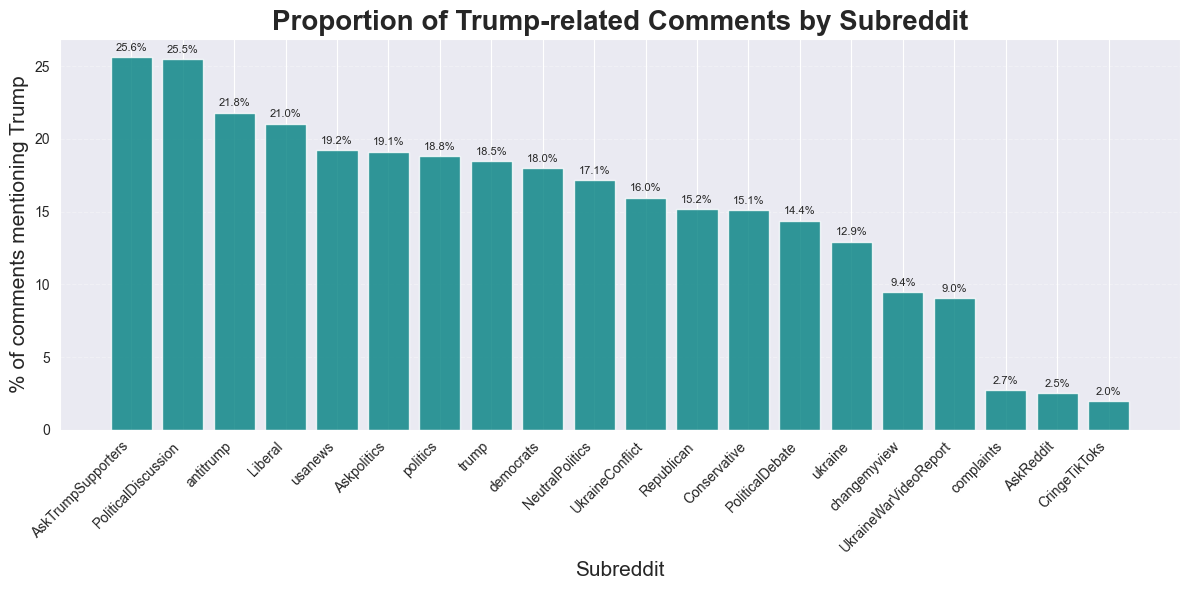

In [41]:
sub_counts = data['subreddit'].value_counts()
filtered_counts = data_filtered['subreddit'].value_counts()
filtered_counts = filtered_counts.reindex(sub_counts.index).fillna(0)

ratios = (filtered_counts / sub_counts).fillna(0)
ratios_sorted = ratios.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(ratios_sorted.index, ratios_sorted.values * 100, color='teal', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3,
                 f"{height:.1f}%", ha='center', va='bottom', fontsize=8)

plt.title('Proportion of Trump-related Comments by Subreddit', fontsize=20, weight='bold')
plt.ylabel('% of comments mentioning Trump', fontsize=15)
plt.xlabel('Subreddit', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

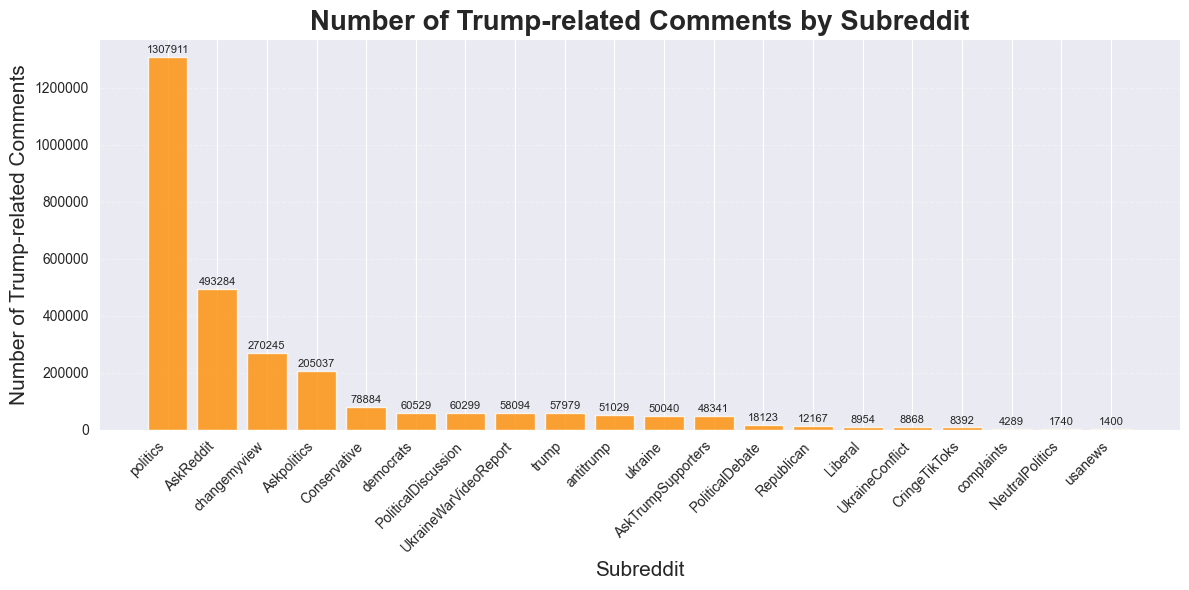

In [42]:
sub_counts = data['subreddit'].value_counts()
filtered_counts = data_filtered['subreddit'].value_counts().fillna(0)

filtered_counts_sorted = filtered_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_counts_sorted.index, filtered_counts_sorted.values, color='darkorange', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + max(filtered_counts_sorted.values) * 0.005,
                 f"{int(height)}", ha='center', va='bottom', fontsize=8)

plt.title('Number of Trump-related Comments by Subreddit', fontsize=20, weight='bold')
plt.ylabel('Number of Trump-related Comments', fontsize=15)
plt.xlabel('Subreddit', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

The graph “Proportion of Trump-related comments by subreddit” illustrates the share of comments within each subreddit that pertain to the topic of this study. In contrast, “Number of comments by subreddit” presents the actual volume of these comments, indicating which communities contribute most to the dataset. Together, these visuals show both the intensity of engagement within each subreddit and the overall distribution of data sources. Notably, while r/AskReddit provides one of the largest total numbers of comments, only a small fraction of them are directly related to Trump, highlighting the subreddit’s broad focus.

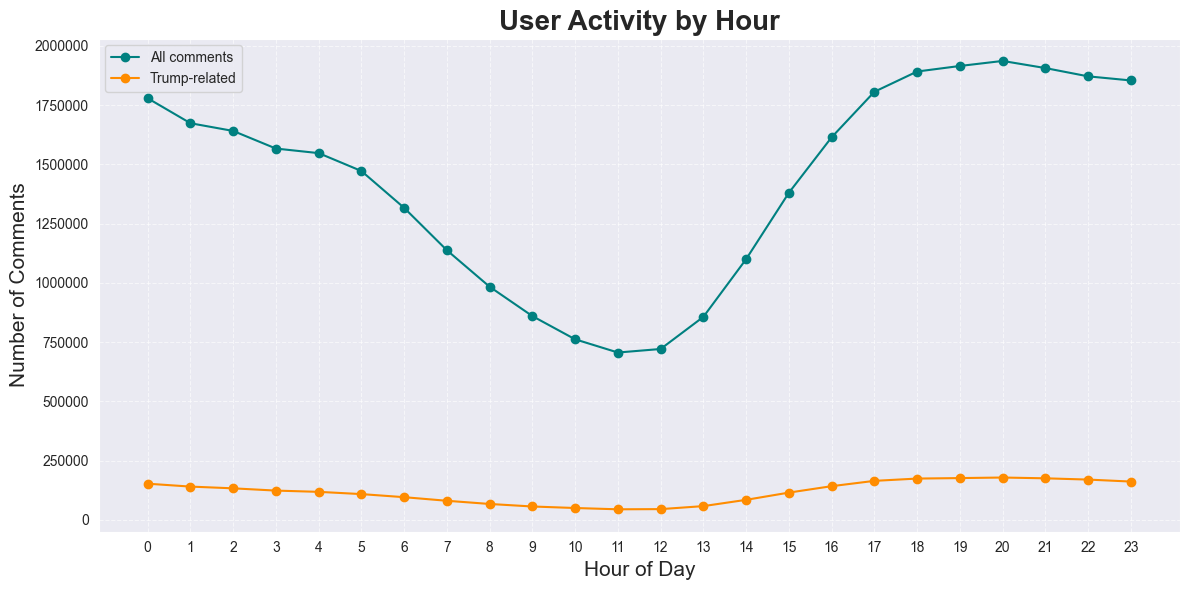

In [43]:
data['hour'] = data['created'].dt.hour
data_filtered['hour'] = data_filtered['created'].dt.hour

hourly_counts = data['hour'].value_counts().sort_index()
hourly_filtered_counts = data_filtered['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', label='All comments', color='teal')
plt.plot(hourly_filtered_counts.index, hourly_filtered_counts.values, marker='o', label='Trump-related', color='darkorange')

plt.title('User Activity by Hour', fontsize=20, weight='bold')
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

This graph illustrates a noticeable decline in the overall number of comments posted at specific hours of the day—particularly around 11:00 UTC (6:00 a.m. EST). However, comments related to Trump show a far smaller decrease during this period and remain relatively stable throughout the day. This pattern could be possibly explained by the activity of Ukrainian subreddits, where users operate within the EET and EEST time zones, corresponding to approximately 1:00 p.m. local time—a period of heightened online engagement. Another explanation is the significantly smaller number of Trump-related comments, which may also affect the graph's curve.


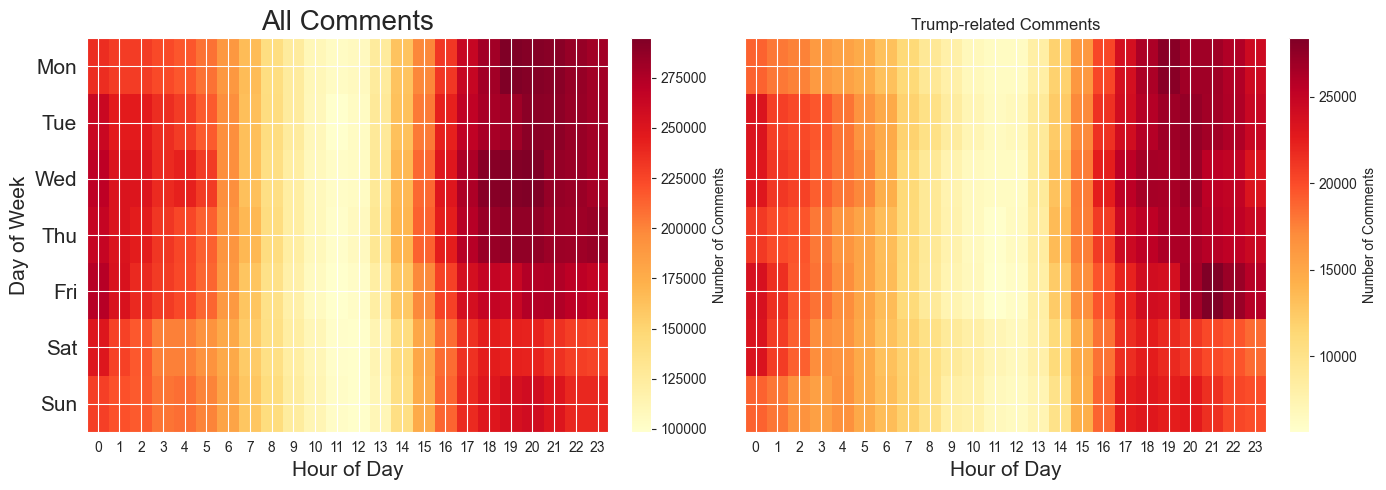

In [44]:
data['day'] = data['created'].dt.dayofweek  # Monday=0, Sunday=6

data_filtered['day'] = data_filtered['created'].dt.dayofweek

heat_all = data.pivot_table(index='day', columns='hour', values='body', aggfunc='count', fill_value=0)
heat_trump = data_filtered.pivot_table(index='day', columns='hour', values='body', aggfunc='count', fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

im0 = axes[0].imshow(heat_all, aspect='auto', cmap='YlOrRd')
axes[0].set_title("All Comments", fontsize=20)
axes[0].set_xlabel("Hour of Day", fontsize=15)
axes[0].set_ylabel("Day of Week", fontsize=15)
axes[0].set_xticks(range(24))
axes[0].set_yticks(range(7))
axes[0].set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=15)

im1 = axes[1].imshow(heat_trump, aspect='auto', cmap='YlOrRd')
axes[1].set_title("Trump-related Comments")
axes[1].set_xlabel("Hour of Day", fontsize=15)
axes[1].set_xticks(range(24))

fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04, label="Number of Comments")
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04, label="Number of Comments")

plt.tight_layout()
plt.show()

These two heatmaps display user activity by day of the week and hour of the day. The patterns are largely similar, and since the dip in comment volume occurs at 11 UTC — matching the previous graph — we can rule out the hypothesis that the flattened Trump-related curve is driven by activity in Ukrainian subreddits.


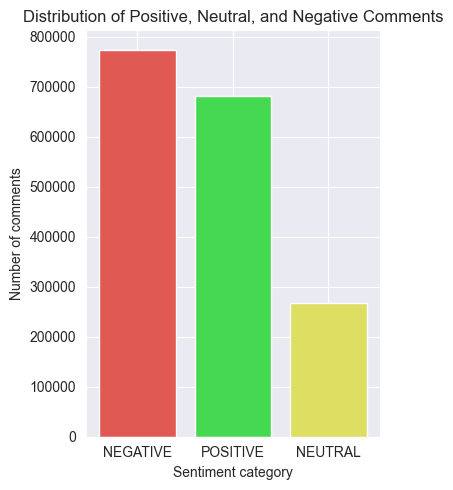

In [45]:
counts = data_filtered_trump['sentiment'].value_counts()

plt.figure(figsize=(4, 5))
plt.bar(counts.index, counts.values, color=['#e05a53', '#45d952', '#dede62'])  # red, yellow, green
plt.title("Distribution of Positive, Neutral, and Negative Comments")
plt.xlabel("Sentiment category")
plt.ylabel("Number of comments")
plt.tight_layout()
plt.show()

This bar chart provides a simplified overview of sentiment in Trump-related comments, revealing that negative comments are more prevalent, though positive ones follow closely behind. However, this visualization offers only a general approximation of the underlying data. Sentiment surrounding political discourse is complex and cannot be accurately captured in such form. A more meaningful interpretation requires analyzing comments within the context of specific discussion topics and political events. These are covered below.

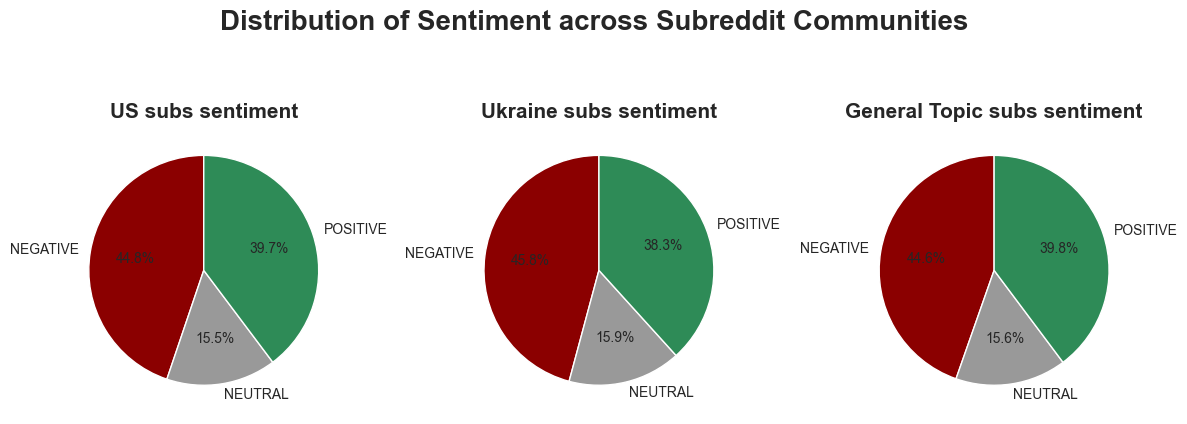

In [46]:
coms = ["US subs", "Ukraine subs", "General Topic subs"]
communities = ['US', 'UA', 'INF']
colors = ["#8b0000", "#999999", "#2e8b57"]  # Negative, Neutral, Positive

plt.figure(figsize=(12,5))

for i, (community, com_label) in enumerate(zip(communities, coms), 1):
    subset = data_filtered_trump[data_filtered_trump["community"] == community]

    counts = subset["sentiment"].value_counts()
    counts = counts.reindex(["NEGATIVE","NEUTRAL","POSITIVE"], fill_value=0)

    plt.subplot(1, 3, i)
    plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", colors=colors, startangle=90)
    plt.title(f"{com_label} sentiment", fontsize=15, fontweight='bold')

plt.suptitle('Distribution of Sentiment across Subreddit Communities', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


Unfortunately, the data follows a certain pattern, so there are no unique distributions to spot. On the other hand, this suggests that the dataset is relatively stable across subreddits.

First of all, let's examine the distribution of sentiment of every group of subreddits that are available. This will provide additional context before a deeper analysis.

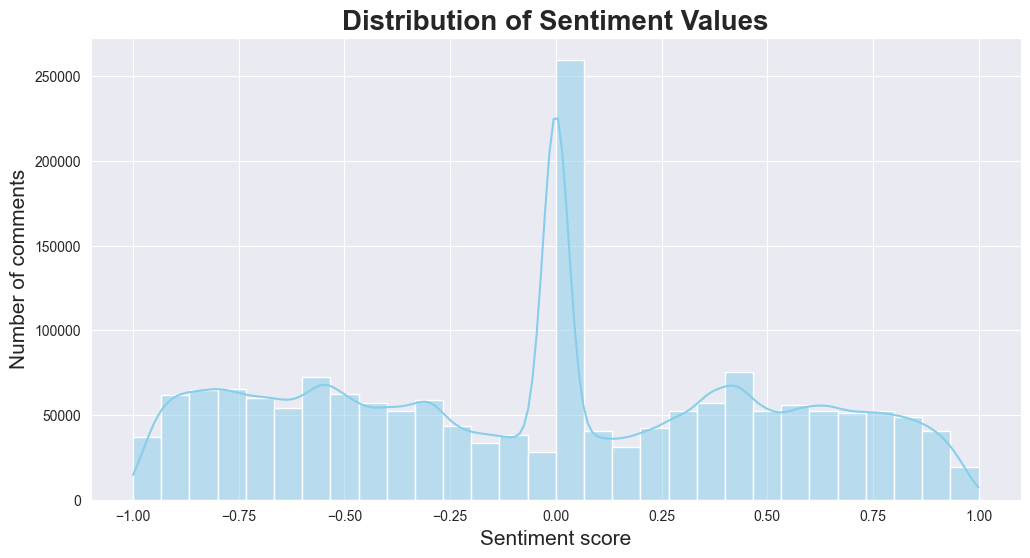

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(data_filtered_trump["compound"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Sentiment Values",fontsize=20, fontweight='bold')
plt.xlabel("Sentiment score", fontsize=15)
plt.ylabel("Number of comments", fontsize=15)
plt.show()

Unique trump_group values: ['Anti-Trump' 'Other' 'Pro-Trump']
Pro-Trump count: 197371
Anti-Trump count: 120512
Compound dtype: float64
NaN in compound: 0


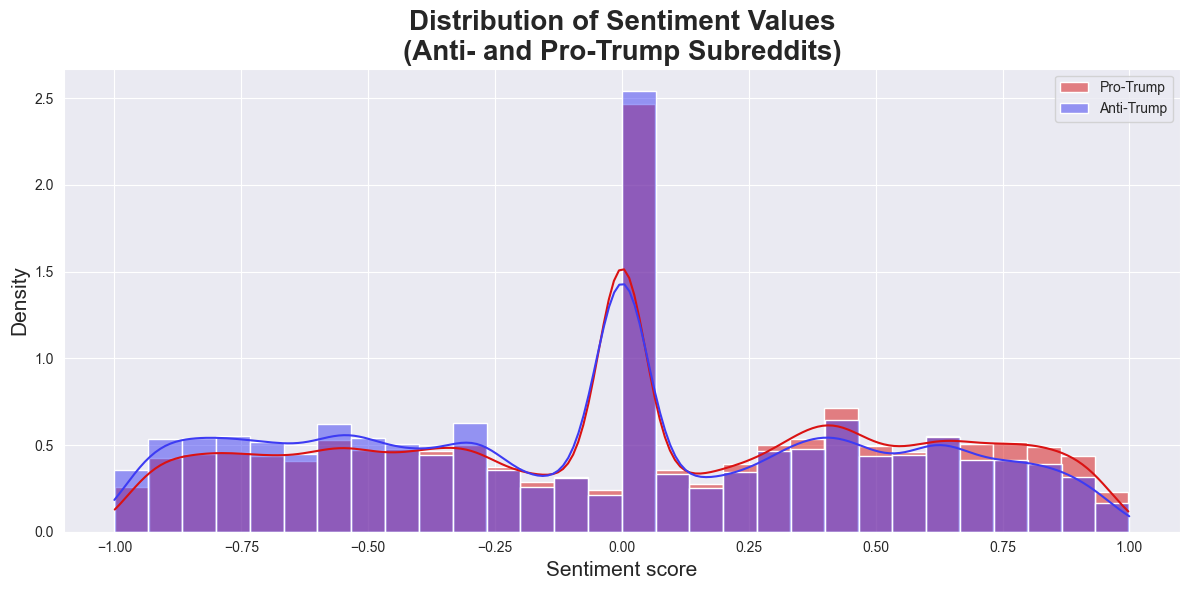

In [48]:
#we use density to avoid errors due to different numbers of comments
pro_trump = {"AskTrumpSupporters", "Conservative", "Republican", "trump"}
anti_trump = {"antitrump", "Liberal", "democrats"}

def trump_group(sub):
    if sub in pro_trump: return "Pro-Trump"
    elif sub in anti_trump: return "Anti-Trump"
    else: return "Other"
data_filtered["trump_group"] = data_filtered["subreddit"].map(trump_group)

print("Unique trump_group values:", data_filtered["trump_group"].unique())
print("Pro-Trump count:", len(data_filtered[data_filtered["trump_group"] == "Pro-Trump"]))
print("Anti-Trump count:", len(data_filtered[data_filtered["trump_group"] == "Anti-Trump"]))
print("Compound dtype:", data_filtered["compound"].dtype)
print("NaN in compound:", data_filtered["compound"].isna().sum())


plt.figure(figsize=(12,6))

sns.histplot(
    data=data_filtered[data_filtered["trump_group"] == "Pro-Trump"],
    x="compound", bins=30, color="#DA1212", label="Pro-Trump", kde=True, stat="density", alpha=0.5
)
sns.histplot(
    data=data_filtered[data_filtered["trump_group"] == "Anti-Trump"],
    x="compound", bins=30, color="#3D3BF3", label="Anti-Trump", kde=True, stat="density", alpha=0.5
)
plt.title("Distribution of Sentiment Values\n(Anti- and Pro-Trump Subreddits)",fontsize=20, fontweight='bold')
plt.xlabel("Sentiment score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

We see on the two previous graphs that although comments with a strictly neutral sentiment make up the smallest share, the highest concentration of values lies close to the neutral center. When combined, however, the total number of positive and negative comments far exceeds the neutral ones. The graph illustrates that anti-Trump subreddits display a predominantly negative tone toward the U.S. President, while pro-Trump communities are noticeably more positive. However, both groups frequently overlap in sentiment, as shown by the intersecting purple areas on the graph, indicating moments of more nuanced or less polarized discussion.

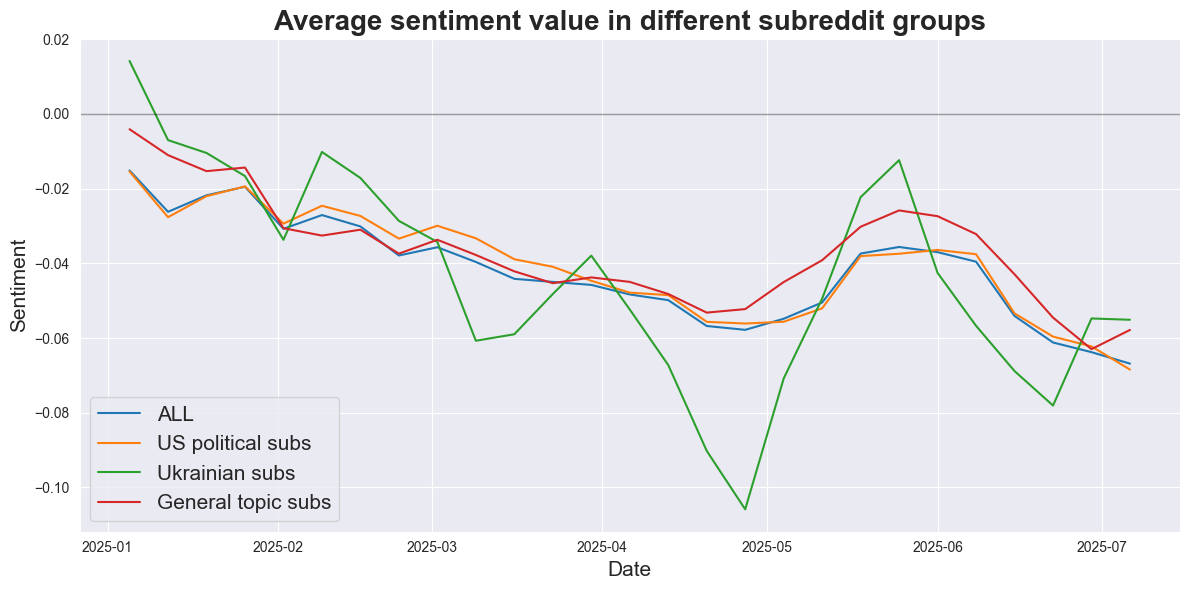

In [49]:
def trend_line(d, label):
    t = (d.set_index("date").resample("W")["compound"].mean()
           .rolling(4, min_periods=1).mean()) 
    plt.plot(t.index, t.values, label=label)

plt.figure(figsize=(12,6))
trend_line(data_filtered_trump, "ALL")
trend_line(data_filtered_trump[data_filtered_trump["community"]=="US"], "US political subs")
trend_line(data_filtered_trump[data_filtered_trump["community"]=="UA"], "Ukrainian subs")
trend_line(data_filtered_trump[data_filtered_trump["community"]=="INF"], "General topic subs")
plt.axhline(0, color="k", lw=1, alpha=.4)
plt.title("Average sentiment value in different subreddit groups",fontsize=20, fontweight='bold')
plt.ylabel("Sentiment", fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

Throughout the entire time period, sentiment toward Trump shows a gradual decline. However, around the end of May there is a slight recovery following events on May 25, 2025, when Trump announced the postponement of a 50% tariff on imports from the European Union. On the same day, he also issued strong criticism of Putin after Russia’s yet another massive attack on Ukraine. The temporary improvement in sentiment may reflect approval of his economic decision, while the lingering negative tone could stem from discussions surrounding Russia in connection with Trump’s remarks.


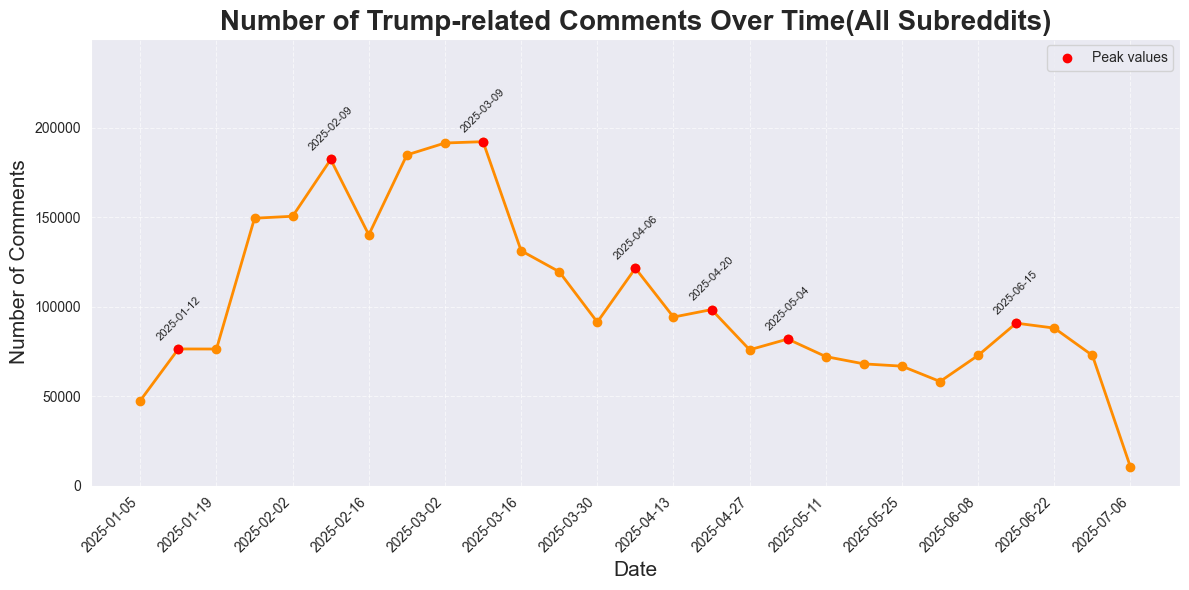

In [50]:
data_filtered['created'] = pd.to_datetime(data_filtered['created'])
weekly_counts = data_filtered.resample('W', on='created').size()

plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', color='darkorange', linewidth=2)

y = weekly_counts.values
spike_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
spike_dates = weekly_counts.index[spike_indices]
spike_values = weekly_counts.values[spike_indices]

plt.scatter(spike_dates, spike_values, color='red', zorder=5)

for x, y_val in zip(spike_dates, spike_values):
    plt.text(x, y_val + max(weekly_counts.values) * 0.02,
             x.strftime('%Y-%m-%d'),
             ha='center', va='bottom', fontsize=8, rotation=45)

plt.ylim(0, weekly_counts.max() * 1.3)

plt.title('Number of Trump-related Comments Over Time(All Subreddits)', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(weekly_counts.index[::2], weekly_counts.index.strftime('%Y-%m-%d')[::2], rotation=45, ha='right')

plt.scatter([], [], color='red', label='Peak values')
plt.legend()

plt.tight_layout()
plt.show()

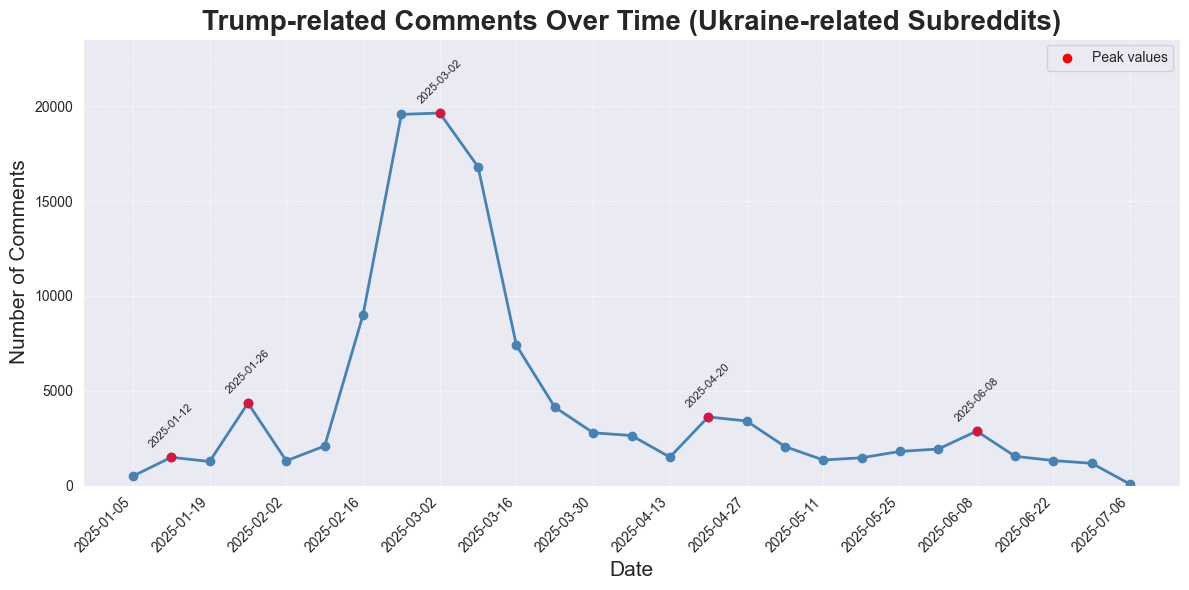

In [51]:
subs = ['ukraine', 'UkraineWarVideoReport', 'UkraineConflict']
subset = data_filtered[data_filtered['subreddit'].isin(subs)].copy()

subset['created'] = pd.to_datetime(subset['created'])
weekly_counts = subset.resample('W', on='created').size()

plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', color='steelblue', linewidth=2)

y = weekly_counts.values
spike_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
spike_dates = weekly_counts.index[spike_indices]
spike_values = weekly_counts.values[spike_indices]

plt.scatter(spike_dates, spike_values, color='crimson', zorder=5)

for x, y_val in zip(spike_dates, spike_values):
    plt.text(x, y_val + max(weekly_counts.values) * 0.02,
             x.strftime('%Y-%m-%d'),
             ha='center', va='bottom', fontsize=8, rotation=45)

plt.ylim(0, weekly_counts.max() * 1.2)

plt.title('Trump-related Comments Over Time (Ukraine-related Subreddits)', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(weekly_counts.index[::2], weekly_counts.index.strftime('%Y-%m-%d')[::2], rotation=45, ha='right')

plt.scatter([], [], color='red', label='Peak values')
plt.legend()

plt.tight_layout()
plt.show()

As we can see from the two previous graphs, the comment activity across both of them reveals several distinct spikes corresponding to key political events. The most active period occurs between late February and early March, aligning with the Oval Office meeting between Donald Trump and Volodymyr Zelenskyi on February 28.

In the weeks surrounding Trump’s second inauguration, both graphs show an increase in comment volume followed by a decline in February. This drop is somewhat unexpected, given that on February 12, Trump reported having a “lengthy and productive” phone conversation with Putin.

Another significant rise in activity is observed around April 6, coinciding with widespread public debate over Trump’s newly imposed tariffs. A subsequent spike appears on April 20, the deadline for Defense Secretary Pete Hegseth and Homeland Security Director Kristi Noem to submit a joint report on conditions at the southern border. Their recommendations concerning the Insurrection Act of 1807 and the National Emergencies Act of 1976 likely fueled public engagement during this period.

On April 26-27 President Trump met with Ukrainian President Volodymyr Zelensky for the first time since their Oval Office meeting to discuss the situation in Crimea. According to a White House spokesperson, the talks were described as a “very productive discussion.” This causes a rise in the number of comments around that time.

Comment volume begins to increase again in early June. On June 8, protests against ICE in Los Angeles prompted Trump to deploy National Guard units to “address the lawlessness.” The first graph records the highest point of this trend on June 15, immediately following renewed demonstrations in Los Angeles.


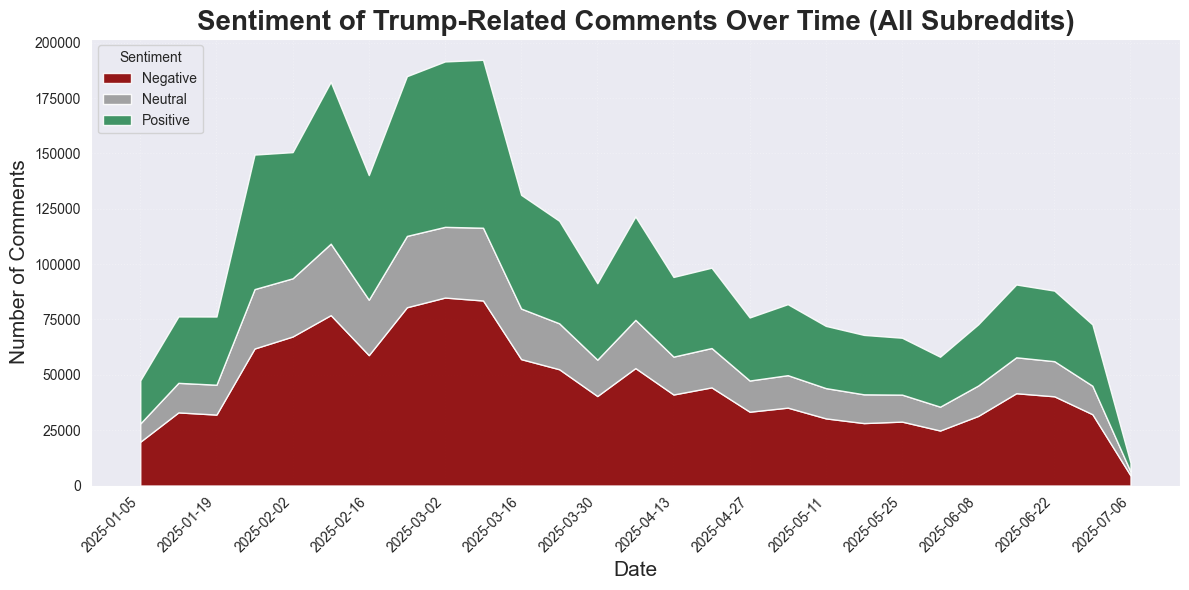

In [52]:

data_filtered["created"] = pd.to_datetime(data_filtered["created"])

weekly_sentiment = (
    data_filtered
    .groupby([pd.Grouper(key="created", freq="W"), "sentiment"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=["NEGATIVE", "NEUTRAL", "POSITIVE"], fill_value=0)
)

plt.figure(figsize=(12, 6))
plt.stackplot(
    weekly_sentiment.index,
    weekly_sentiment["NEGATIVE"],
    weekly_sentiment["NEUTRAL"],
    weekly_sentiment["POSITIVE"],
    labels=["Negative", "Neutral", "Positive"],
    colors=["#8b0000", "#999999", "#2e8b57"],
    alpha=0.9
)

plt.title("Sentiment of Trump-Related Comments Over Time (All Subreddits)", fontsize=20, fontweight="bold")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of Comments", fontsize=15)
plt.legend(title="Sentiment", loc="upper left")
plt.grid(alpha=0.3, linestyle=":")
plt.xticks(
    weekly_sentiment.index[::2],
    weekly_sentiment.index.strftime('%Y-%m-%d')[::2],
    rotation=45, ha='right'
)
plt.tight_layout()
plt.show()


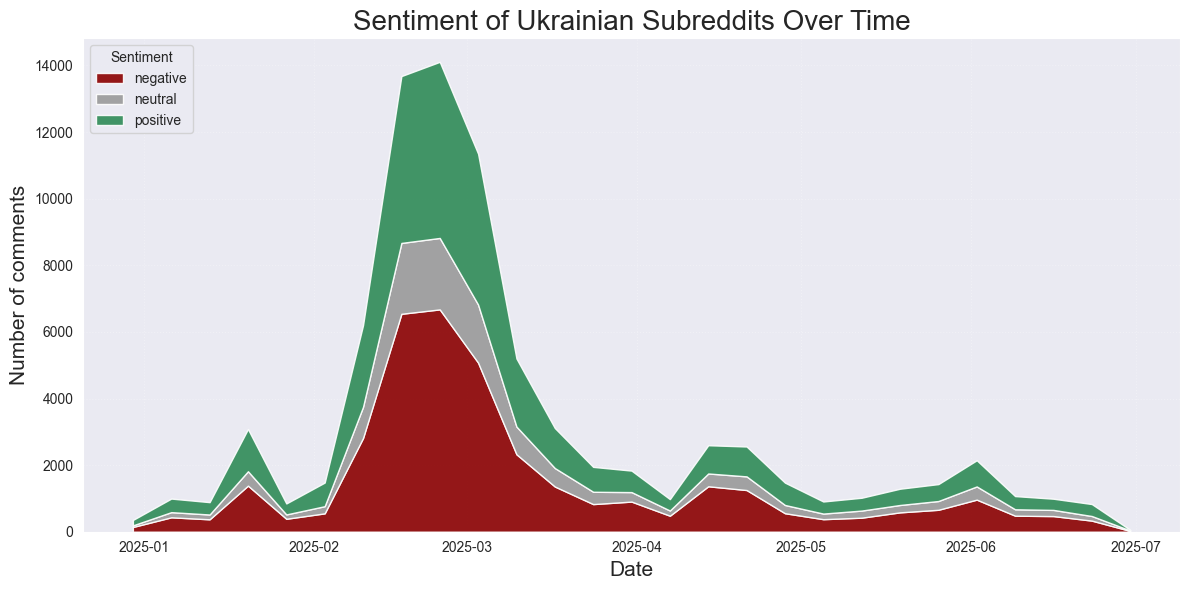

In [53]:
ua = data_filtered_trump[data_filtered_trump["community"]=="UA"]
ua["period"] = ua["date"].dt.to_period("2W").dt.to_timestamp()
sent_trend = (
    ua.groupby(["period", "sentiment"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=["NEGATIVE", "NEUTRAL", "POSITIVE"], fill_value=0)
)

plt.figure(figsize=(12,6))
plt.stackplot(sent_trend.index,
              sent_trend["NEGATIVE"], sent_trend["NEUTRAL"], sent_trend["POSITIVE"],
              labels=["negative", "neutral", "positive"],
              colors=["#8b0000", "#999999", "#2e8b57"],
              alpha=0.9)

plt.title("Sentiment of Ukrainian Subreddits Over Time", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of comments", fontsize=15)
plt.legend(title="Sentiment", loc="upper left")
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
plt.show()

This graph shows that throughout the entire observed period, the proportions of positive, neutral, and negative comments about Trump remain relatively stable within Ukrainian subreddits. In contrast, when considering all subreddits collectively, these proportions fluctuate a little more noticeably over time, suggesting that sentiment toward Trump is more consistent within Ukrainian online communities than across the broader Reddit landscape.


In [54]:
import matplotlib.dates as mdates

biweekly_ukraine = data_filtered_ukraine.resample('2W', on='created')['compound'].mean()
biweekly_russia = data_filtered_russia.resample('2W', on='created')['compound'].mean()

combined = pd.concat([biweekly_ukraine, biweekly_russia], axis=1)
combined.columns = ['Ukraine', 'Russia']

combined = combined.dropna()

corr = combined['Ukraine'].corr(combined['Russia'])
print("Correlation between Ukraine and Russia biweekly sentiment:", corr)


Correlation between Ukraine and Russia biweekly sentiment: 0.7947716868053225


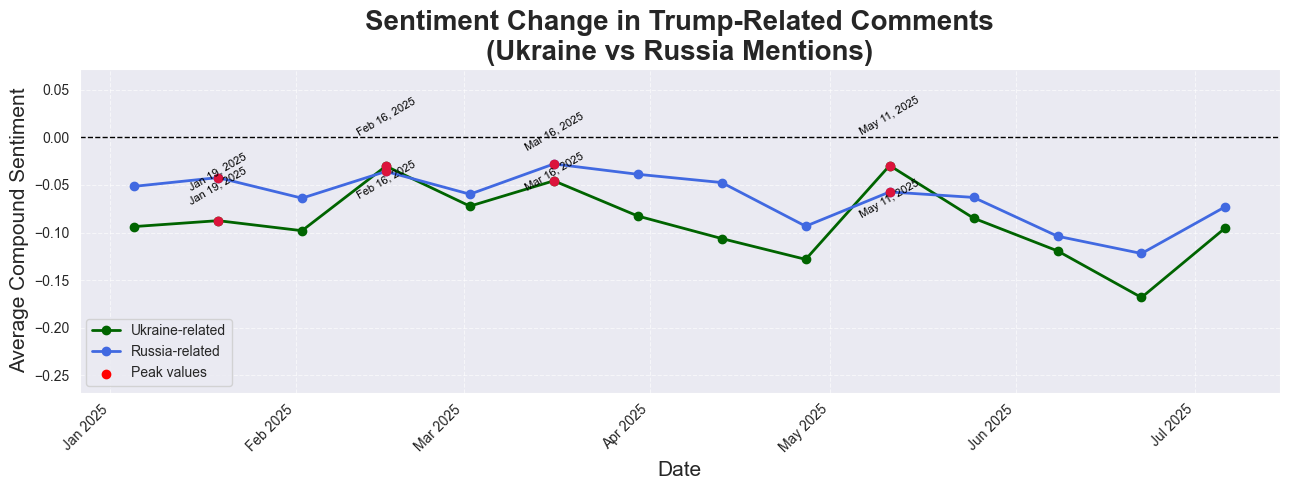

In [55]:
plt.figure(figsize=(13, 5))
plt.plot(biweekly_ukraine.index, biweekly_ukraine.values, marker='o',
         color='darkgreen', linewidth=2, label='Ukraine-related')
plt.plot(biweekly_russia.index, biweekly_russia.values, marker='o',
         color='royalblue', linewidth=2, label='Russia-related')

for series, color, label, offset in [
    (biweekly_ukraine, 'darkgreen', 'Ukraine-related', 0.03),
    (biweekly_russia, 'royalblue', 'Russia-related', -0.03)
]:
    y = series.values
    if len(y) > 2:
        spike_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
        spike_dates = series.index[spike_indices]
        spike_values = series.values[spike_indices]
        plt.scatter(spike_dates, spike_values, color='crimson', zorder=5)

        for x, y_val in zip(spike_dates, spike_values):
            plt.text(x, y_val + offset,
                     x.strftime('%b %d, %Y'),
                     ha='center', va='bottom', fontsize=8,
                     rotation=30, color='black', zorder=10)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylim(
    min(biweekly_ukraine.min(), biweekly_russia.min()) - 0.1,
    max(biweekly_ukraine.max(), biweekly_russia.max()) + 0.1
)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')

plt.title("Sentiment Change in Trump-Related Comments\n(Ukraine vs Russia Mentions)",
          fontsize=20, fontweight='bold')
plt.xlabel("Date", fontsize=15)
plt.ylabel("Average Compound Sentiment", fontsize=15)
plt.legend(title="Topic")
plt.grid(True, linestyle='--', alpha=0.6)

plt.scatter([], [], color='red', label='Peak values')
plt.legend()

plt.tight_layout()
plt.show()

The increase in sentiment around Ukraine on February 16, 2025, can be linked to Donald Trump’s announcement that he intended to discuss “peace in Ukraine” with Vladimir Putin at a possible meeting in Riyadh, Saudi Arabia. At the same time, Trump described Russia’s potential return to the G7 as “unacceptable,” which may have influenced discussions and sentiment online.

Subsequent rises in sentiment for both Ukraine and Russia can be associated with events in March 2025. On March 9, reports emerged regarding negotiations in Saudi Arabia related to the Russian-Ukrainian war. On March 16, it was announced that a conversation with the Russian president would take place that week to discuss a potential ceasefire in Ukraine.

On May 11, 2025, Ukrainian-related sentiment increased following developments in peace efforts. Volodymyr Zelenskyi expressed his readiness to meet with his Russian counterpart, Vladimir Putin, that week. This statement came shortly after Trump urged Zelenskyi to accept an invitation from Moscow for direct peace talks in Turkey. Zelenskyi reiterated calls for a ceasefire beginning the next day but did not specify whether this would serve as a precondition for negotiations.

Since a larger proportion of comments focused on potential solutions to the war rather than on the people themselves, this graph should not be interpreted as a reliable source of information on public opinions about Russians or Ukrainians as nations. It primarily reflects reactions to political events and conflict-related developments rather than broader social sentiment. This accounts for the overall correlation of 0.8 between the two sets of mentions.


In [56]:
biweekly_sentiment_ice = data_filtered_ice.resample('2W', on='created')['compound'].mean()
biweekly_sentiment_imm = data_filtered_imm.resample('2W', on='created')['compound'].mean()

combined_ice_imm = pd.concat([biweekly_sentiment_ice, biweekly_sentiment_imm], axis=1)
combined_ice_imm.columns = ['ICE', 'IMM']

combined_ice_imm = combined_ice_imm.dropna()

pearson_corr = combined_ice_imm['ICE'].corr(combined_ice_imm['IMM'])
print("Pearson correlation between ICE and IMM biweekly sentiment:", pearson_corr)


Pearson correlation between ICE and IMM biweekly sentiment: 0.5889763418811492


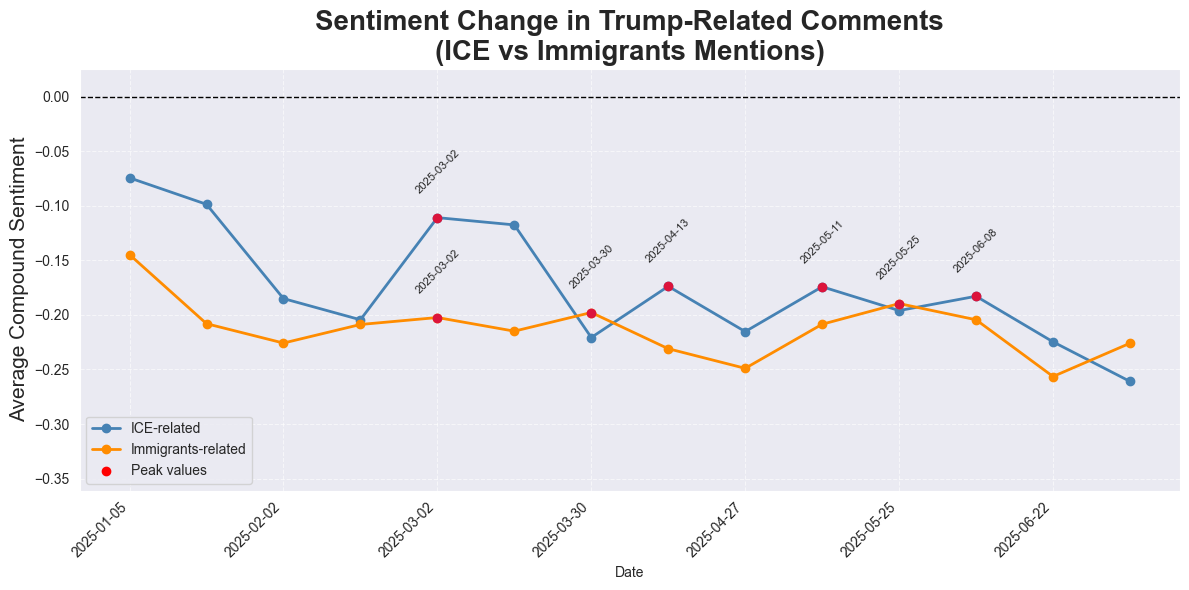

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(biweekly_sentiment_ice.index, biweekly_sentiment_ice.values,
         marker='o', color='steelblue', linewidth=2, label='ICE-related')
plt.plot(biweekly_sentiment_imm.index, biweekly_sentiment_imm.values,
         marker='o', color='darkorange', linewidth=2, label='Immigrants-related')

# Mark peaks for both
for biweekly_sentiment, color in [(biweekly_sentiment_ice, 'steelblue'),
                                  (biweekly_sentiment_imm, 'darkorange')]:
    y = biweekly_sentiment.values
    spike_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
    spike_dates = biweekly_sentiment.index[spike_indices]
    spike_values = biweekly_sentiment.values[spike_indices]
    plt.scatter(spike_dates, spike_values, color='crimson', zorder=5)
    for x, y_val in zip(spike_dates, spike_values):
        plt.text(x, y_val + 0.02,
             x.strftime('%Y-%m-%d'),
             ha='center', va='bottom', fontsize=8, rotation=45)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylim(
    min(biweekly_sentiment_ice.min(), biweekly_sentiment_imm.min()) - 0.1,
    max(biweekly_sentiment_ice.max(), biweekly_sentiment_imm.max()) + 0.1
)

plt.title("Sentiment Change in Trump-Related Comments\n(ICE vs Immigrants Mentions)",
          fontsize=20, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Average Compound Sentiment", fontsize=15)
plt.legend(title="Topic", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(biweekly_sentiment_ice.index[::2],
           biweekly_sentiment_ice.index.strftime('%Y-%m-%d')[::2],
           rotation=45, ha='right')

plt.scatter([], [], color='red', label='Peak values')
plt.legend()

plt.tight_layout()
plt.show()

It is notable how these two curves regarding ICE and immigrants correlate less than expected(only 0.59) as the two of these topics are often mentioned together, but we can clearly see the drop of the sentiment around ICE at the time of LA protests in June 2025.
The drop of sentiment for immigrants and a rise for ICE marks the period around Enemies Act Regarding the Invasion of The United States by Tren De Aragua.

The US deported more than 250 mainly Venezuelan alleged gang members to El Salvador despite a US judge’s ruling to halt the flights on Saturday after Donald Trump controversially invoked the Alien Enemies Act, a 1798 law meant only to be used in wartime. (which was on Mar 15) with ha peak point on the following day, Mar 16.

On the previous night of April 13, 2025, 45 out of 181 facilities exceeded their contractual capacity. Donald Trump campaigned on the promise that he would crack down against pro-Palestinian student protesters. That is when we see another drop in ICE sentiment.

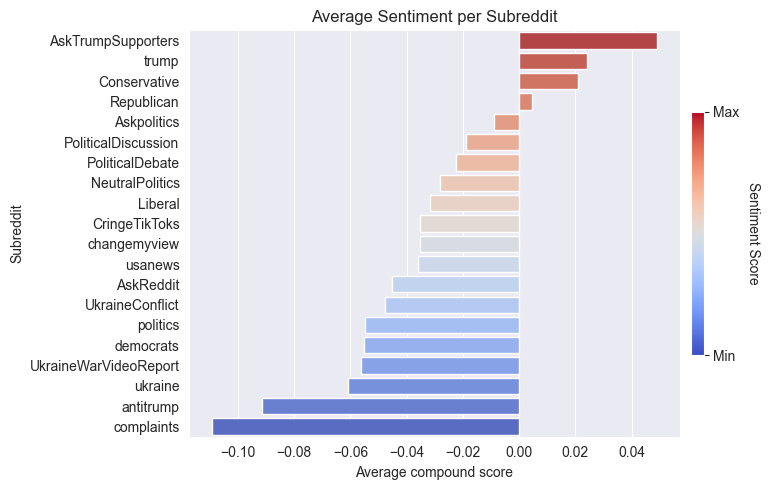

In [58]:
import matplotlib as mpl
avg_sent = data_filtered_trump.groupby("subreddit")["compound"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_sent.values, y=avg_sent.index, hue=avg_sent.index, palette="coolwarm", legend=False)
plt.title("Average Sentiment per Subreddit")
plt.xlabel("Average compound score")
plt.ylabel("Subreddit")
plt.gca().invert_yaxis()
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap("coolwarm"), norm=norm)
sm.set_array([0, 1])
cbar = plt.gcf().colorbar(
    sm,
    ax=plt.gca(),
    orientation="vertical",
    pad=0.02,
    shrink=0.6
)
cbar.set_label("Sentiment Score", rotation=270, labelpad=15)
cbar.set_ticks([-1, 1])
cbar.set_ticklabels(["Min", "Max"])

plt.tight_layout()
plt.show()


The graph highlights the sentiment of comments related to Trump. As shown, the general tone of each subreddit strongly influences its sentiment values. For instance, **r/complaints** is dominated by negative comments, reflecting the subreddit’s overall purpose, while **r/AskTrumpSupporters** exhibits a more positive sentiment, as users often respond in ways that defend or justify Trump’s actions. Interestingly, **r/NeutralPolitics** demonstrates a noticeable bias as well, suggesting that discussions there are not as balanced or impartial as the name implies.


In [59]:
pro_trump = data_filtered[data_filtered["trump_group"] == "Pro-Trump"]
anti_trump = data_filtered[data_filtered["trump_group"] == "Anti-Trump"]

pro_weekly = pro_trump.resample('W', on='created')['compound'].mean()
anti_weekly = anti_trump.resample('W', on='created')['compound'].mean()

combined = pd.concat([pro_weekly, anti_weekly], axis=1)
combined.columns = ['Pro-Trump', 'Anti-Trump']

combined = combined.dropna()

corr = combined['Pro-Trump'].corr(combined['Anti-Trump'])
print("Correlation between Pro-Trump and Anti-Trump weekly sentiment:", corr)

Correlation between Pro-Trump and Anti-Trump weekly sentiment: 0.740934361150031


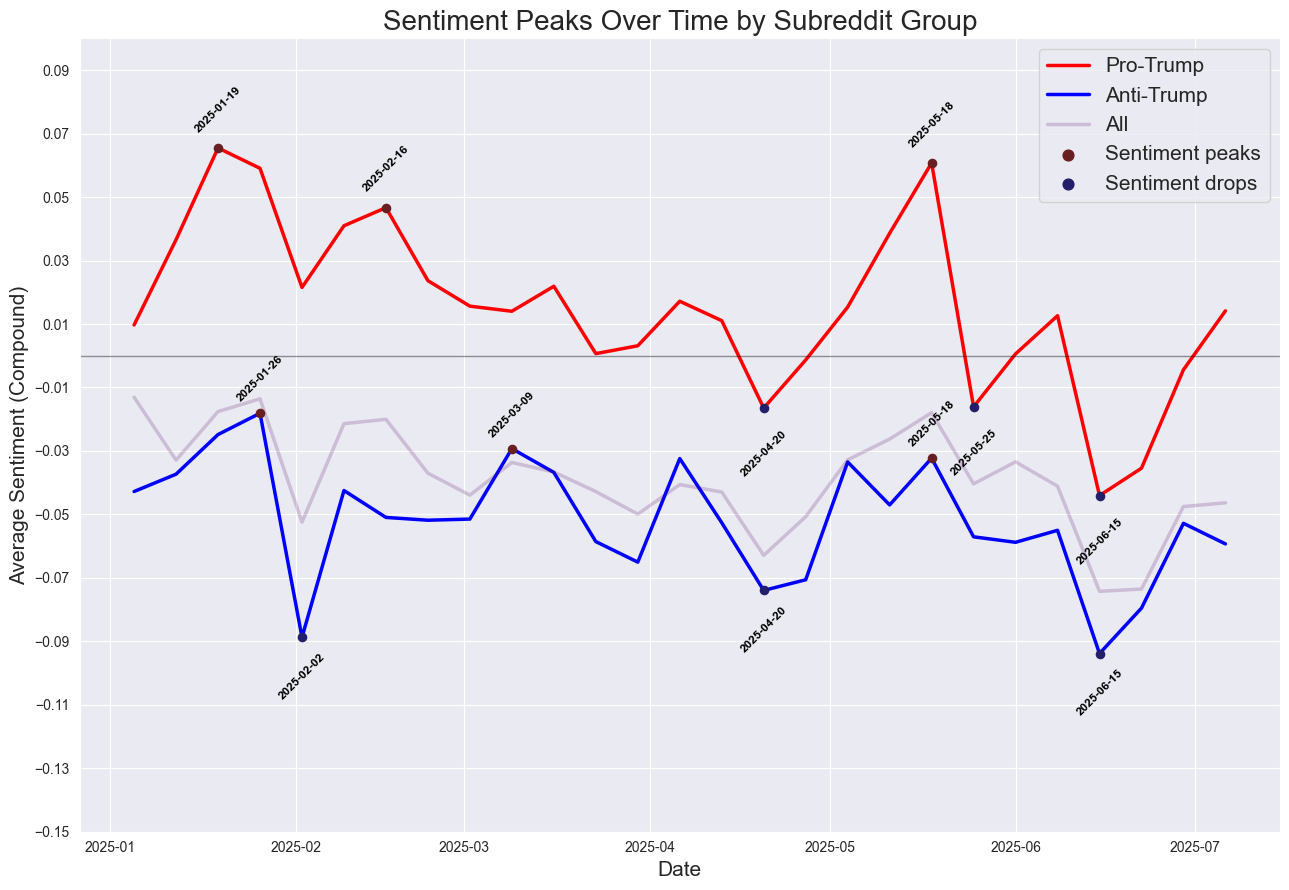

In [60]:

def trend_line_2(d, label, color, alpha=0.5):
    t = d.set_index("created").resample("W")["compound"].mean()
    plt.plot(t.index, t.values, label=label, color=color, lw=2.5, alpha=alpha)

plt.figure(figsize=(13, 9))

groups = {
    "Pro-Trump": ("red", data_filtered[data_filtered["trump_group"] == "Pro-Trump"]),
    "Anti-Trump": ("blue", data_filtered[data_filtered["trump_group"] == "Anti-Trump"])
}

for label, (color, data) in groups.items():
    t = data.set_index("created").resample("W")["compound"].mean()
    plt.plot(t.index, t.values, label=label, color=color, lw=2.5)
    y = t.values
    x = t.index

    if len(y) > 2:
        spike_max_idx = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
        spike_min_idx = np.where((y[1:-1] < y[:-2]) & (y[1:-1] < y[2:]))[0] + 1

        spike_max_dates, spike_max_vals = x[spike_max_idx], y[spike_max_idx]
        spike_min_dates, spike_min_vals = x[spike_min_idx], y[spike_min_idx]

        # select only the top 3 most significant peaks and drops
        top_max_idx = np.argsort(spike_max_vals)[-3:]
        top_min_idx = np.argsort(spike_min_vals)[:3]
        spike_max_dates, spike_max_vals = spike_max_dates[top_max_idx], spike_max_vals[top_max_idx]
        spike_min_dates, spike_min_vals = spike_min_dates[top_min_idx], spike_min_vals[top_min_idx]

        plt.scatter(spike_max_dates, spike_max_vals, color="#691e22", s=35, zorder=5)
        plt.scatter(spike_min_dates, spike_min_vals, color="#231e69", s=35, zorder=5)


        for xd, yd in zip(spike_max_dates, spike_max_vals):
            plt.text(xd, yd + (max(y) - min(y)) * 0.04,
                     xd.strftime('%Y-%m-%d'),
                     ha='center', va='bottom', fontsize=8.5, rotation=45,
                     color='black', fontweight='bold')

        for xd, yd in zip(spike_min_dates, spike_min_vals):
            plt.text(xd, yd - (max(y) - min(y)) * 0.06,
                     xd.strftime('%Y-%m-%d'),
                     ha='center', va='top', fontsize=8.5, rotation=45,
                     color='black', fontweight='bold')

trend_line_2(data_filtered, "All", "#540863", alpha=.2)
plt.axhline(0, color='k', lw=1, alpha=.4)
plt.title("Sentiment Peaks Over Time by Subreddit Group", fontsize=20)
plt.ylabel("Average Sentiment (Compound)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.yticks(np.arange(-0.15, 0.1, 0.02))  # y-axis from -1 to 1 with step 0.2
plt.ylim(-0.15, 0.1)

plt.scatter([], [], color="#691e22", s=60, label="Sentiment peaks")
plt.scatter([], [], color="#231e69", s=60, label="Sentiment drops")

plt.legend(fontsize=15)
plt.tight_layout()
plt.show()



Here we observe how sentiment in Trump-related comments differs between Pro- and Anti-Trump communities. Their views remain somewhat polarized, yet both stay close to the neutral center. The graphs also show a noticeable correlation, with a calculated value of 0.74.

Sentiment peaks on January 19, the day before Trump’s second-term inauguration. It then drops sharply on February 2, 2025, following his announcement of new tariffs on Mexico, Canada, and China, which triggered widespread negative reactions. Positive shifts occur in early March, as was mentioned before, corresponding to reports on Saudi Arabia negotiations regarding the Russian-Ukrainian war and announcements of upcoming discussions about a ceasefire with the Russian president.

A notable decline follows on April 20, 2025, linked to the immigration crackdown. Sentiment rises again in mid-May, around May 18, 2025, amid developments in the Ukraine conflict and foreign policy. Vice President J.D. Vance and Secretary of State Marco Rubio met with Zelenskyi in Rome to discuss peace, while Trump’s adviser highlighted coordination with Israel during Middle East negotiations. Some of the negative tone during this period is also associated with reactions to Trump’s megabill.

Finally, sentiment drops significantly on June 15, 2025, during the G7 summit and nationwide protests in the U.S. Trump opposed Israel’s plan to target Iran’s supreme leader, emphasizing the U.S. reluctance to intervene, while massive “No Kings” protests erupted across the country, following a week of demonstrations against ICE raids in immigrant communities.





In [61]:
biweekly_zel = data_zel.resample('2W', on='created')['compound'].mean()
biweekly_filtered_trump = data_filtered_trump.resample('2W', on='created')['compound'].mean()

combined = pd.concat([biweekly_zel, biweekly_filtered_trump], axis=1)
combined.columns = ['zel', 'trump']

combined = combined.dropna()

corr_value = combined['zel'].corr(combined['trump'])
print(f"Correlation between Zelenskyi-related and Trump-related biweekly sentiment: {corr_value:.3f}")

Correlation between Zelenskyi-related and Trump-related biweekly sentiment: 0.593


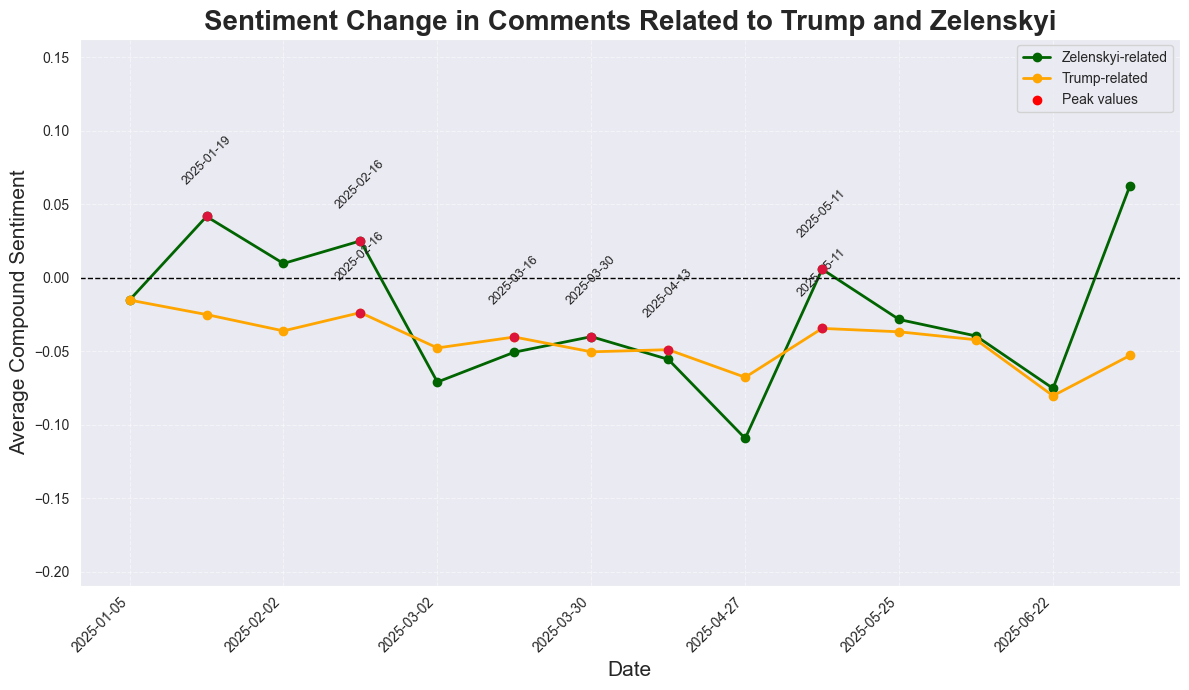

In [62]:
plt.figure(figsize=(12, 7))

plt.plot(biweekly_zel.index, biweekly_zel.values, marker='o', color='darkgreen', linewidth=2, label='Zelenskyi-related')
plt.plot(biweekly_filtered_trump.index, biweekly_filtered_trump.values, marker='o', color='orange', linewidth=2, label='Trump-related')

def add_spikes(series, color):
    y = series.values
    if len(y) > 2:
        spike_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
        spike_dates = series.index[spike_indices]
        spike_values = series.values[spike_indices]
        plt.scatter(spike_dates, spike_values, color=color, zorder=5)
        for x, y_val in zip(spike_dates, spike_values):
            plt.text(x, y_val + 0.02,
                     x.strftime('%Y-%m-%d'),
                     ha='center', va='bottom', fontsize=9, rotation=45)

add_spikes(biweekly_zel, 'crimson')
add_spikes(biweekly_filtered_trump, 'crimson')

plt.axhline(0, color='black', linestyle='--', linewidth=1)

ymin = min(biweekly_zel.min(), biweekly_filtered_trump.min()) - 0.1
ymax = max(biweekly_zel.max(), biweekly_filtered_trump.max()) + 0.1
plt.ylim(ymin, ymax)

plt.title("Sentiment Change in Comments Related to Trump and Zelenskyi", fontsize=20, fontweight='bold')
plt.xlabel("Date", fontsize=15)
plt.ylabel("Average Compound Sentiment", fontsize=15)
plt.legend(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(biweekly_zel.index[::2], biweekly_zel.index.strftime('%Y-%m-%d')[::2], rotation=45, ha='right')

plt.scatter([], [], color='red', label='Peak values')
plt.legend()

plt.tight_layout()
plt.show()

Since the major events have been covered, the key peak dates are as follows:

* **January 19, 2025** – day before Trump’s second-term inauguration
* **February 16, 2025** – Trump announces plans to discuss “peace in Ukraine” with Putin; calls Russia’s return to the G7 “unacceptable”
* **March 16, 2025** – announcement of upcoming talks with Putin on a Ukraine ceasefire
* **April 26-27** – Trump and Zelenskyi Oval Office meeting
* **May 11, 2025** – Zelensky expresses readiness to meet Putin following Trump’s suggestion for direct peace talks in Turkey

The correlation between Zelenskyi- and Trump-related comments is positive, although not too strong – just 0.55. They do share similar rises and dips in sentiment, with Trump's curve staying more stable due to more comments mentioning him.





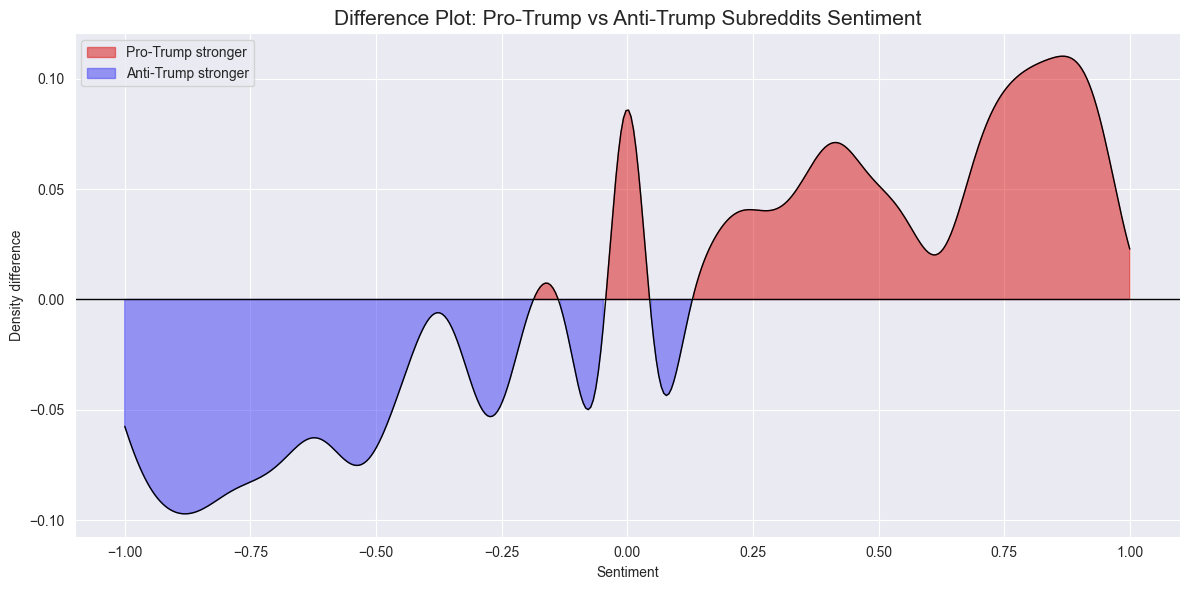

In [63]:
from scipy.stats import gaussian_kde

pro = data_filtered[data_filtered["trump_group"]=="Pro-Trump"]["compound"].dropna()
anti = data_filtered[data_filtered["trump_group"]=="Anti-Trump"]["compound"].dropna()

xs = np.linspace(-1, 1, 400)
pro_kde = gaussian_kde(pro)(xs)
anti_kde = gaussian_kde(anti)(xs)

difference = pro_kde - anti_kde

plt.figure(figsize=(12,6))
plt.plot(xs, difference, color="black", linewidth=1)
plt.fill_between(xs, difference, where=difference>0, color="#DA1212", alpha=0.5, label="Pro-Trump stronger")
plt.fill_between(xs, difference, where=difference<0, color="#3D3BF3", alpha=0.5, label="Anti-Trump stronger")

plt.axhline(0, color="black", lw=1)
plt.title("Difference Plot: Pro-Trump vs Anti-Trump Subreddits Sentiment", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Density difference")
plt.legend()
plt.tight_layout()
plt.show()

Concluding the main part of the EDA, here is another distribution of sentiment across two political groups. At each point, the graph approximates the difference between the number of comments with given sentiment between the pro-Trump and anti-Trump subreddits. Thus, the red part shows the portion of the sentiment scale where pro-Trump subreddits dominate in terms of quantity and intensity, while the blue part of the graph shows the same for anti-Trump subreddits.


# Conclusion

The analysis shows that sentiment toward Trump on Reddit from January to June 2025 largely follows major political events. Overall tone declines gradually, with noticeable shifts around key moments such as tariff announcements, immigration policies, and discussions on the Russian-Ukrainian war.

Pro- and anti-Trump subreddits differ predictably in tone but often converge near neutrality, suggesting nuanced discussion despite polarization. Activity patterns remain stable across time zones, confirming dataset consistency.

Overall, sentiment trends mirror real-world developments — reactive, event-driven, and shaped by Trump’s political actions and global events.
